In [2]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from matplotlib import animation, patches

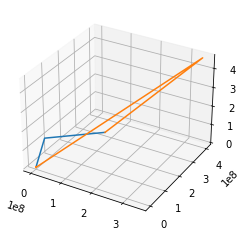

In [27]:
class Body:
    def __init__(self, name, mass, radius, r0 = np.zeros(3), v0 = np.zeros(3)):
        self.name = name
        self.mass = mass
        self.rad = radius
        self.r0 = np.array(r0)
        self.v0 = np.array(v0)

    current_r = 0
    current_v = 0

    
def deriv(y, t, bodies):
    
    G = 6.67408e-11
    n = len(bodies)

    r_v = np.array(np.split(y, n))
    drdt = np.zeros(r_v.shape)

    for i in range(n):
        bodies[i].current_r = r_v[i][:3]
        bodies[i].current_v = r_v[i][3:6]
    

    for i in range(n):
        for j in range(n):
            if i != j:
                dist = np.linalg.norm(bodies[i].current_r - bodies[j].current_r)
                dist = dist**-3
                drdt[i][2*i:(2*i+3)] = bodies[i].current_v
                drdt[i][(2*i+3):2*(i+3)] += -G*bodies[j].mass*dist
    drdt = np.reshape(drdt, ((6*n)))
    return drdt

def gen_solar():
    AU = 149597871

    earth = Body('Earth', 5.97219e24, 6.357e3, [1.02 * AU, 0, 0], [0, 29.29e3, 0])
    sun = Body('Sun', 1.9891e30, 695500)

    bodies = [earth, sun]
    return bodies

t2 = np.linspace(0, 1.5*365*3600, 1000)

def solve_ode(bodies, steps = 1000):

    n = len(bodies)
    rinit = np.zeros(6*n)
    t = np.linspace(0, 1.5*365*3600, steps)

    for i in range(n):
        r = bodies[i].r0
        v = bodies[i].v0
        rinit[6*i:6*(i+1)] = np.concatenate((r, v))
    sol = odeint(deriv, rinit, t, args = (bodies,))

    return sol


if __name__ == '__main__':
    
    bodies = gen_solar()
    sol = solve_ode(bodies)
    r_earth = sol[:][0:4]
    r_sun = sol[:][6:9]
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(r_earth[0], r_earth[1], r_earth[2])
    ax.plot3D(r_sun[0], r_sun[1], r_sun[2])
    plt.show()









In [11]:
AU = 149597871

earth = Body('Earth', 5.97219e24, 6.357e3, [1.02 * AU, 0, 0], [0, 29.29e3, 0])
print(earth)

a = np.zeros(230)
print(a[6*2:6*(2+1)])

[0. 0. 0. 0. 0. 0.]
